In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
from scipy.stats import chi2, norm

1. Сделать имитатор бросания 2 костей (20 000 бросков)

In [2]:
sample = pd.DataFrame({'one':np.random.choice([1,2,3,4,5,6], 20000), 'two':np.random.choice([1,2,3,4,5,6], 20000)})
sample

,one,two
0,3,6
1,1,3
2,2,3
3,4,1
4,4,3
...,...,...
19995,5,3
19996,6,6
19997,5,3
19998,3,3


2. Проверить вероятности выпадения цифр на каждой кости


In [3]:
from collections import Counter
c1 = Counter(sample['one'])
c2 = Counter(sample['two'])

print("Число выпадений цифр на каждой кости:")   
print(c1)
print(c2)



Число выпадений цифр на каждой кости:
Counter({6: 3448, 2: 3351, 4: 3335, 3: 3312, 5: 3278, 1: 3276})
Counter({4: 3471, 2: 3383, 5: 3351, 1: 3317, 6: 3304, 3: 3174})


3. Построить гистограмму выпадения сумм цифр на костях

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


Text(0.5, 0, 'sum')

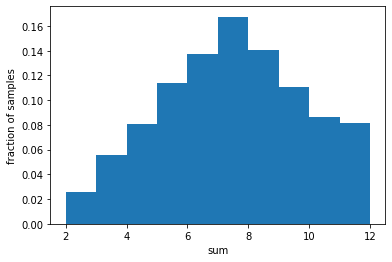

In [4]:
sum = sample['one'] + sample['two']
plt.hist(sum , normed=True)
plt.ylabel('fraction of samples')
plt.xlabel('sum')



4. Сделать 10 000 серий бросков. В каждой серии определить количество бросков до выпадения суммы на костях числа 9


In [5]:
sample_2 = pd.DataFrame({'one':np.random.choice([1,2,3,4,5,6], 10000), 'two':np.random.choice([1,2,3,4,5,6], 10000)})
sum_2 = sample_2['one'] + sample_2['two']
sum9 = np.where(sum_2 == 9)
sum9
sum_9=pd.DataFrame(sum9)
sum_9
#вывели когда выпадает сумма 9

,0,1,2,3,4,5,6,7,8,9,...,1132,1133,1134,1135,1136,1137,1138,1139,1140,1141
0,1,9,25,27,32,35,36,41,53,56,...,9890,9903,9919,9922,9933,9941,9958,9959,9982,9993


In [6]:
sum_9.apply(lambda x: x[2] - x[1], axis = 1)
#думаю как запустить в цикле

0    16
dtype: int64

In [7]:
summ9= []
for i in range(10000):
    k=0
    while True:
        x = (np.random.choice([1,2,3,4,5,6]))
        y = (np.random.choice([1,2,3,4,5,6]))
        k+=1
        if (x + y == 9):
            break;
    summ9.append(k)

    
    

5. Визуализировать результат


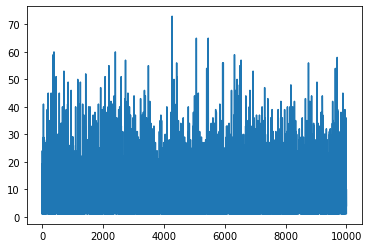

In [8]:
plt.plot(summ9)


6. Сгенерировать последовательность случайных чисел в диапазоне от 0 до 12, с нормальным распределением


In [9]:
h =np.arange(0,13)
mu = np.std(h)
sigma = np.mean(h)
mu = 6.0
sigma = 3.7416573867739413

norm_rv = sts.norm(loc=mu, scale=sigma)
y = norm_rv.rvs(size=50)
y

array([ 2.6835702 ,  5.14209561,  6.51572562,  0.09235475,  0.28519694,
        8.31209114,  8.30335988, 11.20226968,  9.50287423,  3.11439583,
        8.84722994,  0.30395652, 13.4452873 , 12.03183194, 11.7797452 ,
        7.12322172, 16.92533735,  3.83937277,  3.91922998, 10.39120284,
        2.93319093,  2.11654805,  7.04564419,  7.91816459,  3.56186993,
        0.79132171,  2.54959157,  1.36590204,  3.79615622,  3.96517247,
       13.49896746, -1.56679522,  8.26384801,  5.14058594,  9.79984481,
        6.91798783,  1.63026183,  9.71744047,  5.27208187,  4.23207121,
        5.97371337,  5.80939172, 13.74685647,  9.5599711 , 10.56841528,
        5.6495277 ,  8.04350046,  3.7587257 , -0.09619615,  5.91705327])

7. Визуализировать результат


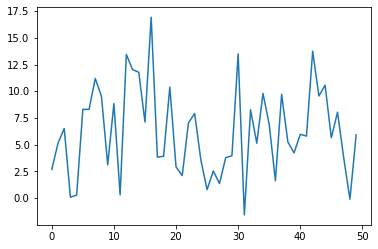

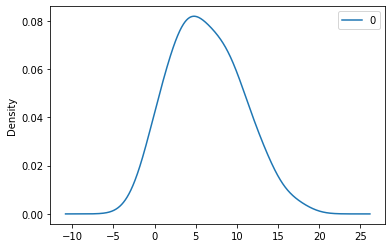

In [10]:
plt.plot(y)
pd.DataFrame(y).plot(kind='density') 

8. Сгенерировать 2 случайные последовательности. Получить из них третью, каждый элемент которой - сумма соответствующих элементов первых двух последовательностей


In [11]:
sequence = pd.DataFrame({"seq1": np.random.random(50), "seq2": np.random.random(50)})
sequence
seq_sum=sequence.apply(func='sum', axis = 1).head()
seq_sum


0    1.181135
1    0.581412
2    0.737049
3    0.661442
4    1.883804
dtype: float64

9. Визуализировать результат


Text(0.5, 0, 'sum')

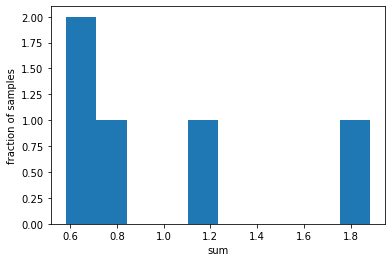

In [12]:
plt.hist(seq_sum)
plt.ylabel('fraction of samples')
plt.xlabel('sum')



10. Проверить, что полученное распределение соответствует нормальному распределению


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """Entry point for launching an IPython kernel.


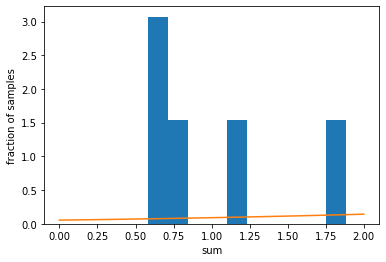

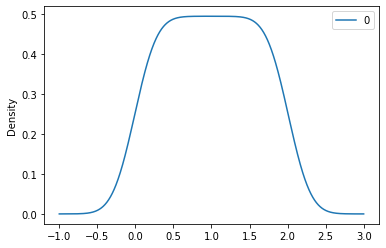

In [13]:
plt.hist(seq_sum, normed=True)
plt.ylabel('fraction of samples')
plt.xlabel('sum')

x = np.linspace(0,2,100)
cdf = norm_rv.cdf(x) 
plt.plot(x, cdf)
pd.DataFrame(x).plot(kind='density') 

11. Из двух предыдущих последовательностей получить четвертую, каждый элемент которой равен отношению соответствующих элементов из первой последовательности к элементу второй последовательности


In [14]:
seq_del=sequence['seq1']/sequence['seq2']
seq_del.head()

0    1.318016
1    8.919854
2    0.104993
3    2.490834
4    0.948135
dtype: float64

12. Визуализировать результат

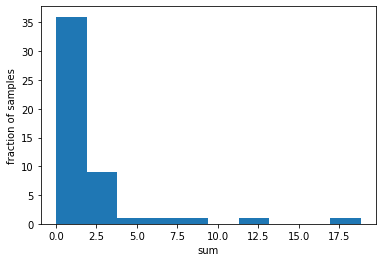

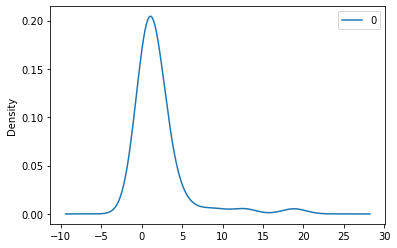

In [15]:
plt.hist(seq_del)
plt.ylabel('fraction of samples')
plt.xlabel('sum')

pd.DataFrame(seq_del).plot(kind='density') 


13. Проверить подчиняется ли полученная последовательность нормальному распределению.


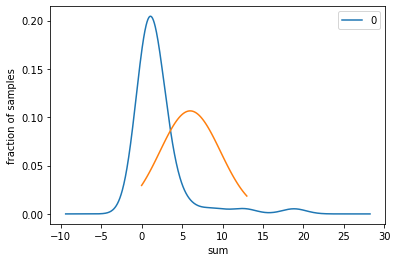

In [16]:
pd.DataFrame(seq_del).plot(kind='density') 
plt.ylabel('fraction of samples')
plt.xlabel('sum')

x = np.linspace(0,13,100)
cdf = norm_rv.cdf(x)
pdf = norm_rv.pdf(x)
plt.plot(x, pdf, label='theoretical pdf')

14. Сгенерировать две новые случайные последовательности с разным RandomState.


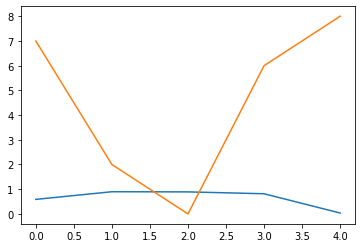

In [17]:
rng = np.random.RandomState(20)
r1 = rng.rand(5)
r2 = rng.randint(0, 10, 5)
plt.plot(r1, label='r1')
plt.plot(r2, label='r2')

16. Проверить корреляцию этих двух последовательностей.


In [18]:
np.corrcoef(r1,r2)


array([[ 1.        , -0.75300666],
       [-0.75300666,  1.        ]])